<a href="https://colab.research.google.com/github/S-AILAB/Forecast-Cab-Booking-Demand-ML-project-/blob/main/Forecast_Cab_Booking_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective:**
To combine historical usage pattern along with the open data sources like weather data to forecast cab booking deman in a city.

#Data:
Hourly renting data span of two is provided.
Randomly divided into train and test set.

#Task to be done:
1. Import the required library
2. Analyze the dataset and write the observation.
   
   a. Check the shape of the training and testing set.
   
   b. Print the data types of each columns.

   c. Check the missing value.
   
   d.You  need  to  append  the train_label dataset to train.csv as ‘Total_booking’ column

3. Feature Engineering:

    a. Create new column date, hour, weekdDay, month from date column
    
    b. Coerce the datatype of season, holiday, workingday, and weather to category.
    
    c. Drop the datetime column.

4. Perform Outlier Analysis:

    a. Plot Box Plots to see outlier

    b.Remove the outliers

5. Perform Correlation Analysis:
    
    a.Plot Correlation analysis plot between "total booking" and ['temp','atemp', 'humidity', 'windspeed']

6. Data Vizualisation:
   
    a. Visualisation distribution of data: total_booking column and plot the probability distribution plot for the column as well.
    
    b.total_booking vs(Month, Season, Hour, Weekday, Usertype)

    c.Use Histogramsto plot all the continuousvariables present in the data.

7. Convert the categorical variables into one hot vector

8. Split your dataset for training and testing.

9. Fit various models (Random Forest Regressor, Ada Boost Regressor, BaggingRegressor, SVR, and K-Neighbors Regressor)

10. Display a Factorplot to visualize the RMSEvalues achieved by different modeling algorithm.

11. Perform Hyper-parameter tuning on the best model using GridSearchCVand print the best parameters using model.best_params_

12. Perform prediction on the test set and print the mean_squared_log_error



# 1. Importing Libraries and reading csv files

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading the files

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_label = pd.read_csv('train_label.csv')
test_label = pd.read_csv('test_label.csv')

# 2. Analyze the dataset and write the observation

a. Check the shape of the training and testing set.

In [3]:
print(train.shape)
train.head()

(8708, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [4]:
print(test.shape)
test.head()

(2178, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [5]:
print(train_label.shape)
train_label.head()

(8707, 1)


,504
0,5
1,139
2,209
3,184
4,791


In [6]:
print(test_label.shape)
test_label.head()

(2177, 1)


,256
0,87
1,11
2,84
3,668
4,53


From above result we can see that the train and test label dataset shape specifically the numbers of rows are mismatching as the label dataset is treating the first entry as column heading. So lets change that.

In [7]:
# Load the data without assuming the first row is a header
train_label = pd.read_csv('train_label.csv', header=None)
test_label = pd.read_csv('test_label.csv', header=None)


In [8]:
print(train_label.shape)
train_label.head()

(8708, 1)


,0
0,504
1,5
2,139
3,209
4,184


In [9]:
print(test_label.shape)
test_label.head()

(2178, 1)


,0
0,256
1,87
2,11
3,84
4,668


b. Print the data types of each columns.

In [10]:
print('Train')
print(train.dtypes, "\n")

print('Test')
print(test.dtypes, "\n")

print('Train_label')
print(train_label.dtypes, "\n")

print('Test_label')
print(test_label.dtypes, "\n")

Train
datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object 

Test
datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object 

Train_label
0    int64
dtype: object 

Test_label
0    int64
dtype: object 



c. Check the missing value.

In [11]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [12]:
test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [13]:
train_label.isna().sum()

0    0
dtype: int64

In [14]:
test_label.isna().sum()

0    0
dtype: int64

d. Concating train_label with train dataset as a new column of Total_booking and doing same with test_label and test dataset.

In [15]:
print(train_label.head())
print(train_label.columns)

print(test_label.head())
print(test_label.columns)

     0
0  504
1    5
2  139
3  209
4  184
Index([0], dtype='int64')
     0
0  256
1   87
2   11
3   84
4  668
Index([0], dtype='int64')


In [16]:
train['Total_booking'] = train_label[0]
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [17]:
test['Total_booking'] = test_label[0]
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


#3. Feature Engineering:



a. Create new column date, hour, weekdDay, month from date column

In [18]:
import calendar
train['date'] = pd.to_datetime(train['datetime']).dt.date
train['hour'] = pd.to_datetime(train['datetime']).dt.hour
train['weekday'] = pd.to_datetime(train['datetime']).dt.day_name()
train['month']=pd.to_datetime(train['datetime']).dt.month_name()
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19,Wednesday,May
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,4,Wednesday,September
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,9,Thursday,January
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16,Friday,November
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13,Tuesday,September


In [19]:
test['date'] = pd.to_datetime(test['datetime']).dt.date
test['hour'] = pd.to_datetime(test['datetime']).dt.hour
test['weekday'] = pd.to_datetime(test['datetime']).dt.day_name()
test['month']=pd.to_datetime(test['datetime']).dt.month_name()
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,2012-05-10,11,Thursday,May
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,2012-06-09,7,Saturday,June
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,2011-03-06,20,Sunday,March
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,2011-10-13,11,Thursday,October
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,2012-06-02,12,Saturday,June


b. Coerce the datatype of season, holiday, workingday, and weather to category.

In [20]:
train.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
date              object
hour               int32
weekday           object
month             object
dtype: object

In [21]:
test.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
date              object
hour               int32
weekday           object
month             object
dtype: object

In [22]:
train['hour']=train.hour.astype('str')
train.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
date              object
hour              object
weekday           object
month             object
dtype: object

In [23]:
test['hour']=test.hour.astype('str')
test.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
date              object
hour              object
weekday           object
month             object
dtype: object

In [24]:
#season, holiday, workingday, and weather
train['season']=train.season.astype('category')
train['holiday']=train.holiday.astype('category')
train['workingday']=train.workingday.astype('category')
train['weather']=train.weather.astype('category')
train['weekday']=train.weekday.astype('category')
train['month']=train.month.astype('category')
train.dtypes


datetime           object
season           category
holiday          category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
Total_booking       int64
date               object
hour               object
weekday          category
month            category
dtype: object

In [25]:
#season, holiday, workingday, and weather
test['season']=test.season.astype('category')
test['holiday']=test.holiday.astype('category')
test['workingday']=test.workingday.astype('category')
test['weather']=test.weather.astype('category')
test['weekday']=test.weekday.astype('category')
test['month']=test.month.astype('category')
test.dtypes

datetime           object
season           category
holiday          category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
Total_booking       int64
date               object
hour               object
weekday          category
month            category
dtype: object

c.drop datetime column

In [26]:
train.drop('datetime', axis=1, inplace=True)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,4,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,9,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13,Tuesday,September


In [27]:
test.drop('datetime', axis=1, inplace=True)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,2012-05-10,11,Thursday,May
1,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,2012-06-09,7,Saturday,June
2,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,2011-03-06,20,Sunday,March
3,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,2011-10-13,11,Thursday,October
4,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,2012-06-02,12,Saturday,June


#4.  Perform Outlier Analysis:

a. Plot Box Plots to see outlier

<Axes: >

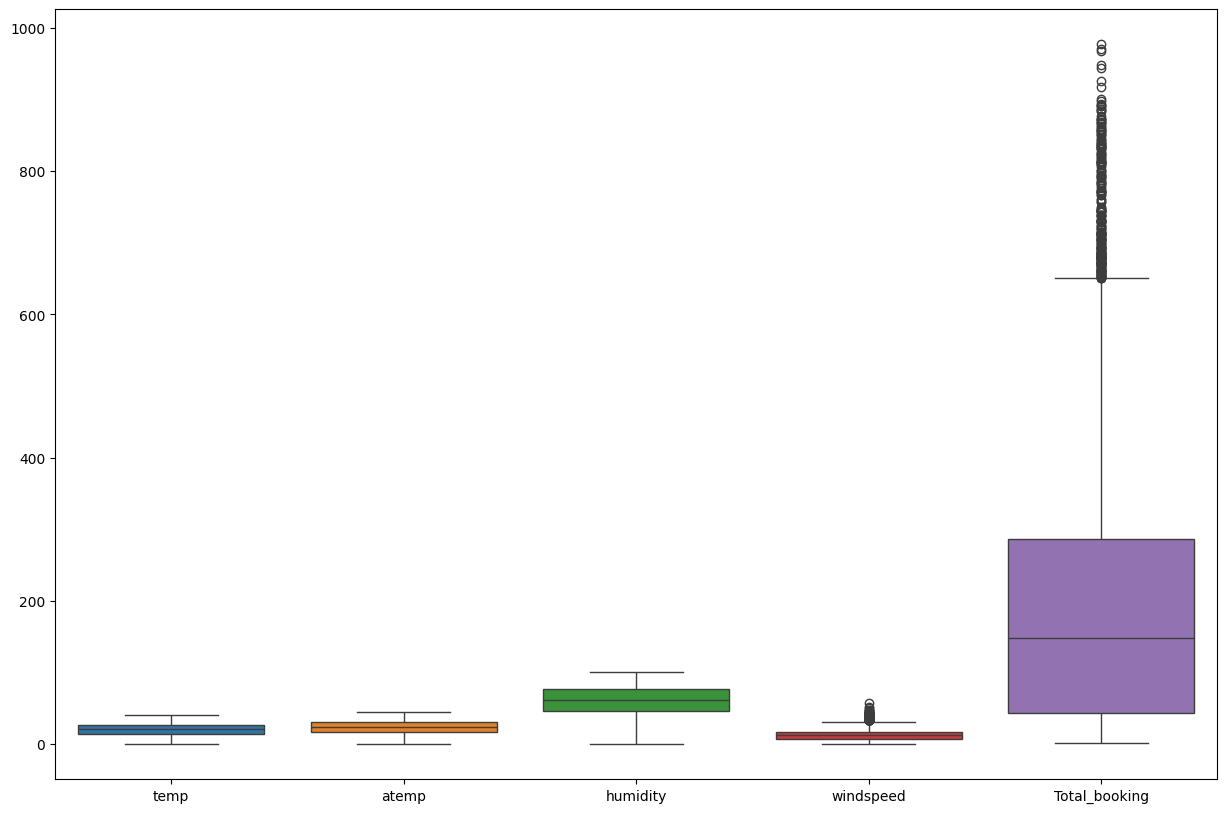

In [28]:
plt.figure(figsize=(15,10))
sns.boxplot(data=train)

<Axes: xlabel='season', ylabel='Total_booking'>

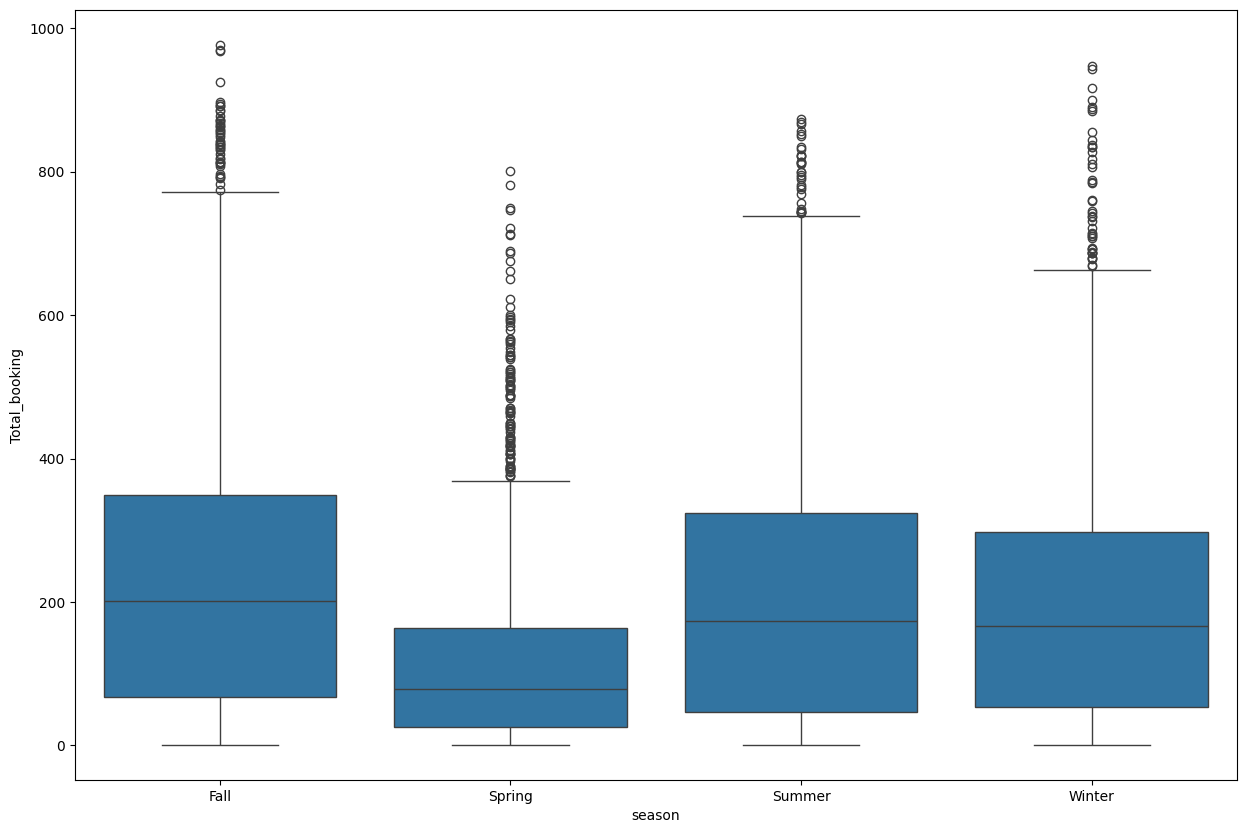

In [29]:
plt.figure(figsize=(15,10))
sns.boxplot( x=train.season, y=train.Total_booking)

The above boxplot shows that there are many outliers in Spring season in comparison to other seasons. This reflects that the number of cab booking in spring season is less than other season.

<Axes: xlabel='hour', ylabel='Total_booking'>

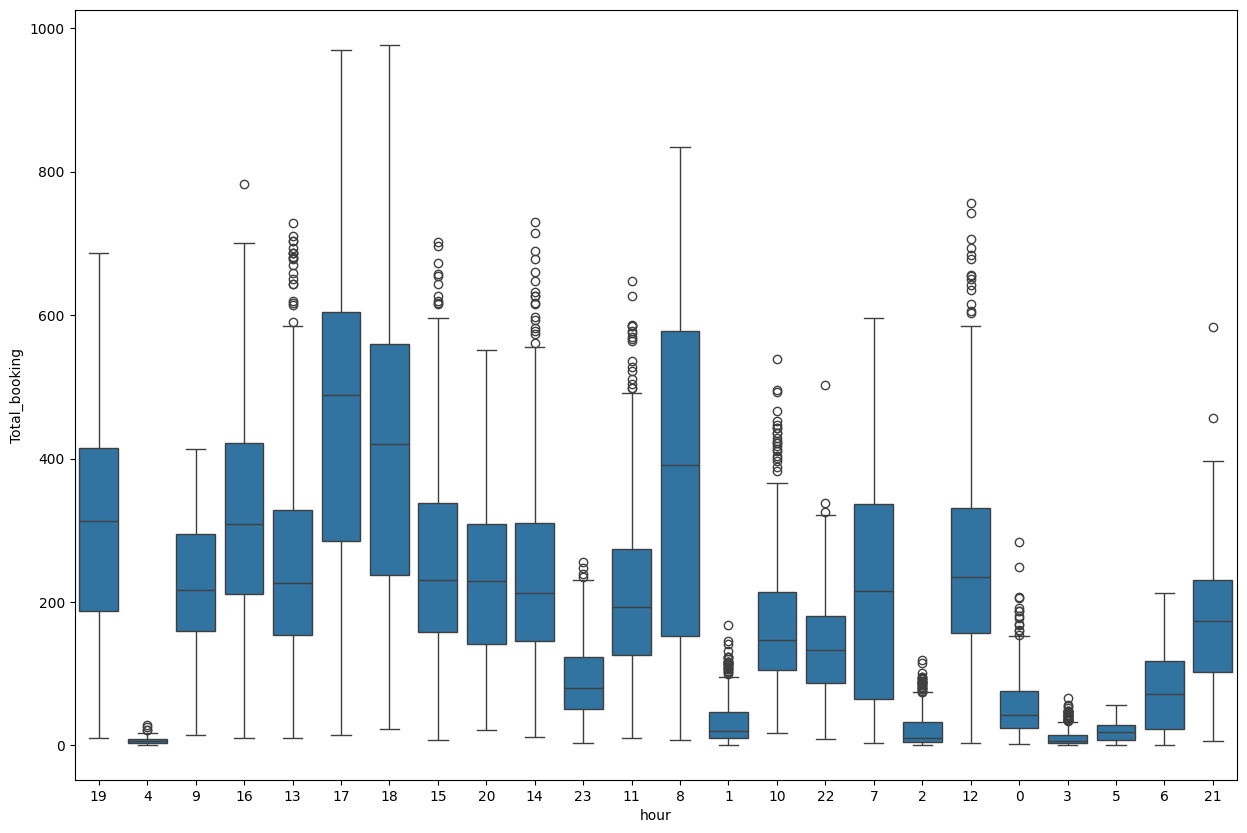

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot( x=train.hour, y=train.Total_booking)

<Axes: >

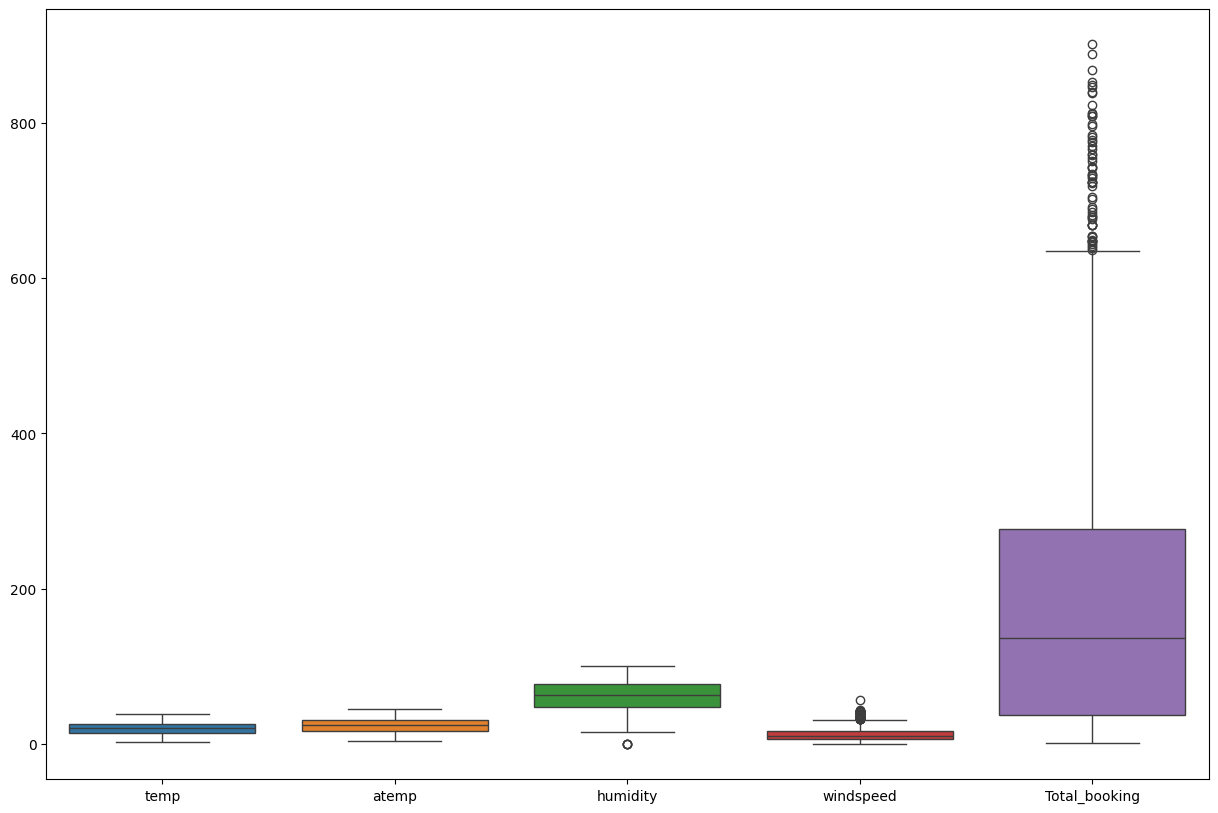

In [31]:
plt.figure(figsize=(15,10))
sns.boxplot(data=test)

<Axes: xlabel='season', ylabel='Total_booking'>

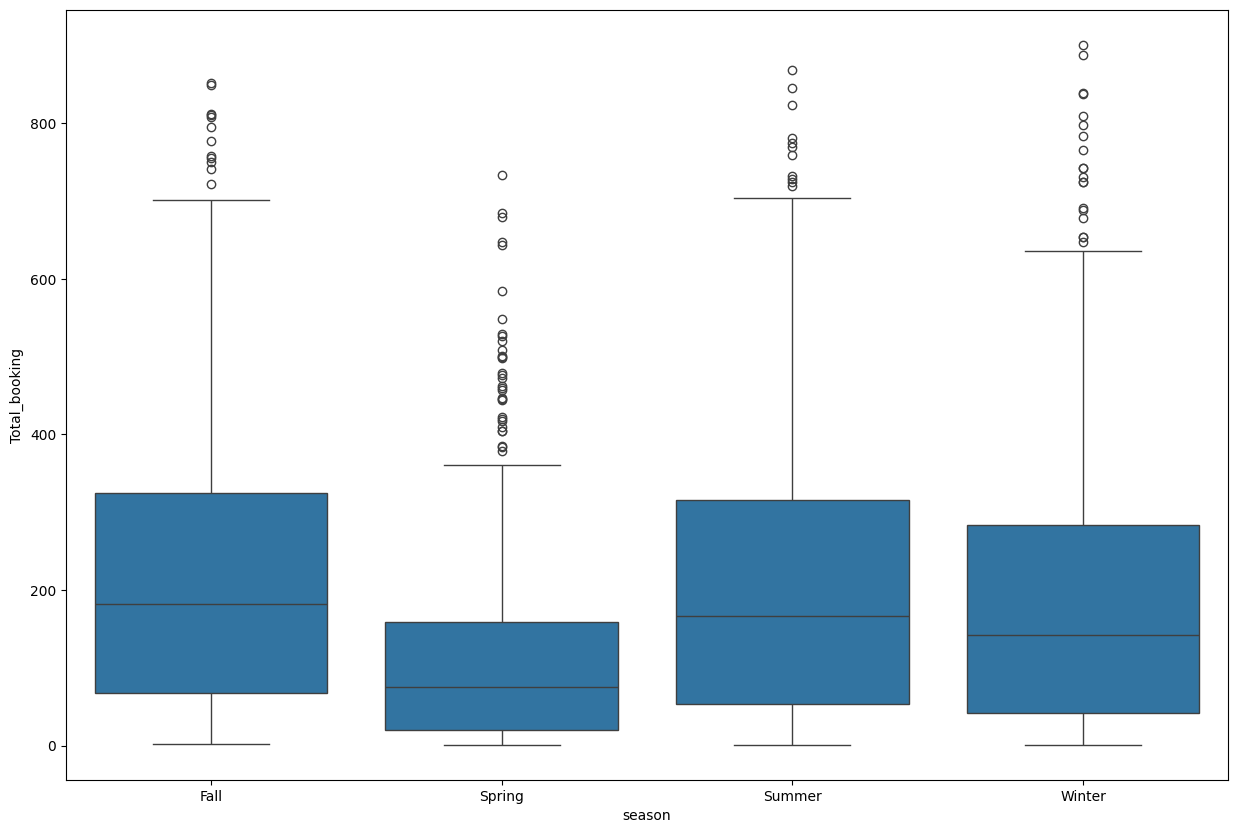

In [32]:
plt.figure(figsize=(15,10))
sns.boxplot( x=test.season, y=test.Total_booking)

<Axes: xlabel='hour', ylabel='Total_booking'>

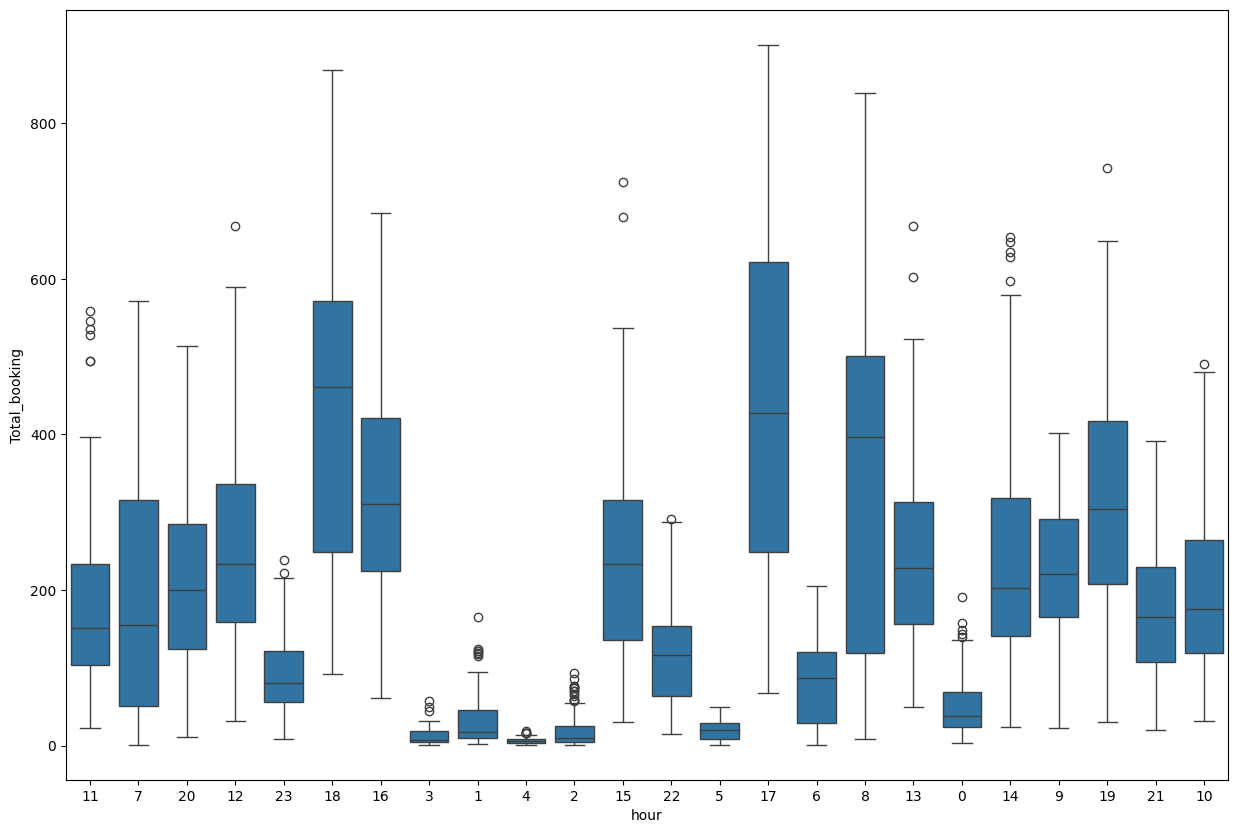

In [33]:
plt.figure(figsize=(15,10))
sns.boxplot( x=test.hour, y=test.Total_booking)

b.Remove the outliers

As from the above boxplot we can see we got lots of outliers in our data. Let treat them by finding and removing them

In [34]:
# q1 = train.Total_booking.quantile(0.25)
# q3 = train.Total_booking.quantile(0.75)
# iqr = q3-q1
# print('Q1: ', q1)
# print('Q3: ', q3)
# print('IQR: ', iqr)
# # Note : 1.5 times the IQR is the treshold value to find the outliers
# upf = q3 + 1.5*iqr
# lowf = q1 - 1.5*iqr
# print('Upper bound: ', upf)
# print('Lower bound: ', lowf)

In [35]:
# q1 = test.Total_booking.quantile(0.25)
# q3 = test.Total_booking.quantile(0.75)
# iqr = q3-q1
# print('Q1: ', q1)
# print('Q3: ', q3)
# print('IQR: ', iqr)
# # Note : 1.5 times the IQR is the treshold value to find the outliers
# upf = q3 + 1.5*iqr
# lowf = q1 - 1.5*iqr
# print('Upper bound: ', upf)
# print('Lower bound: ', lowf)

In [36]:
def outliers(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  upper_bound = q3 + 1.5*iqr
  lower_bound = q1 - 1.5*iqr

  df= df[(df[col] > lower_bound) & (df[col] < upper_bound)]
  return df

In [37]:
new_train = outliers(train, 'Total_booking')
print(new_train.shape)
new_train.head()

(8466, 13)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,4,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,9,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13,Tuesday,September


<Axes: ylabel='Total_booking'>

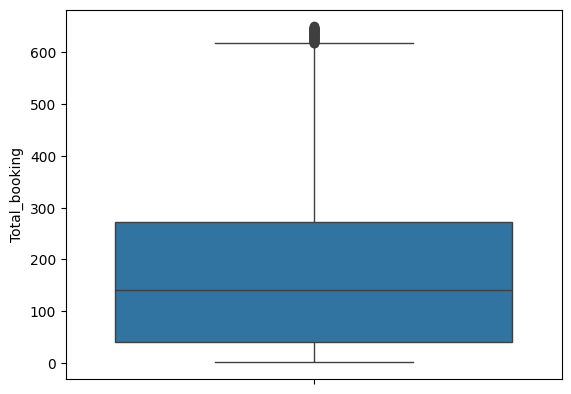

In [38]:
sns.boxplot(data=new_train.Total_booking)

In [39]:
new_test = outliers(train, 'Total_booking')
print(new_test.shape)
new_train.head()

(8466, 13)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,4,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,9,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13,Tuesday,September


<Axes: ylabel='Total_booking'>

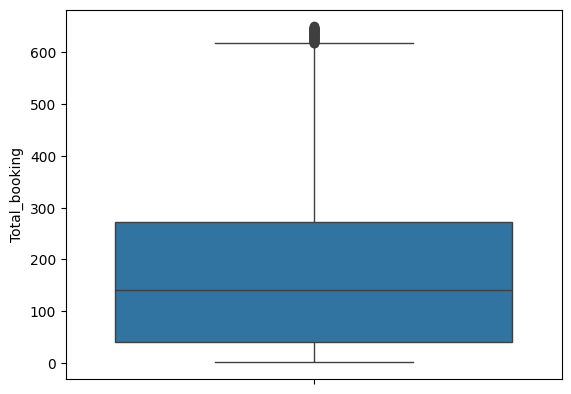

In [40]:
sns.boxplot(data=new_test.Total_booking)

Perform Correlation Analysis:

a.Plot Correlation analysis plot between "total booking" and ['temp','atemp', 'humidity', 'windspeed']

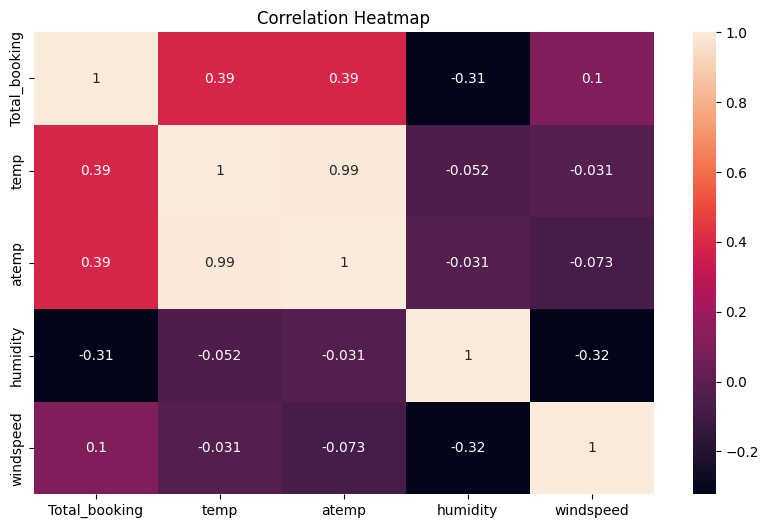

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(new_train[['Total_booking', 'temp', 'atemp', 'humidity', 'windspeed']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

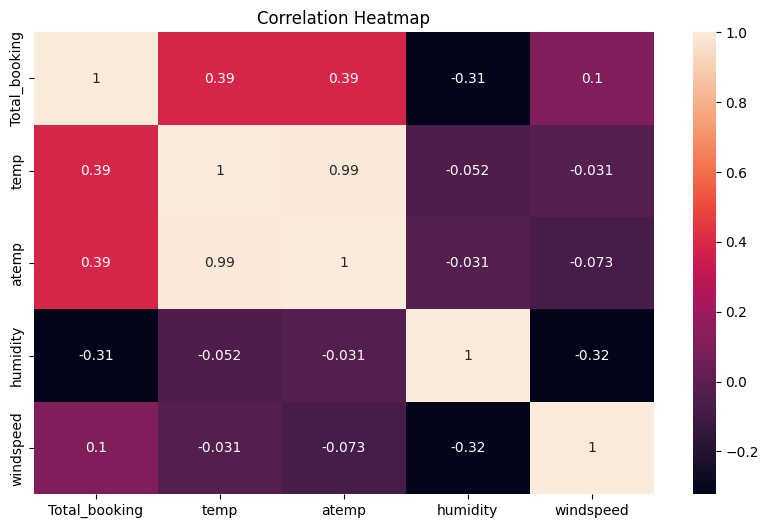

In [42]:
plt.figure(figsize=(10, 6))
sns.heatmap(new_test[['Total_booking', 'temp', 'atemp', 'humidity', 'windspeed']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

Inference: temp and atemp has high co-relation.

#6.Data Vizualisation:

a. Visualisation distribution of data: total_booking column and plot the probability distribution plot for the column as well.

b.total_booking vs(Month, Season, Hour, Weekday, Usertype)

c.Use Histogramsto plot all the continuousvariables present in the data.

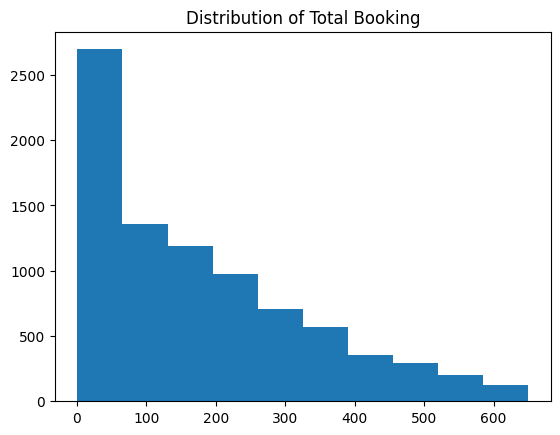

In [43]:
plt.hist(new_train.Total_booking)
plt.title('Distribution of Total Booking')
plt.show()

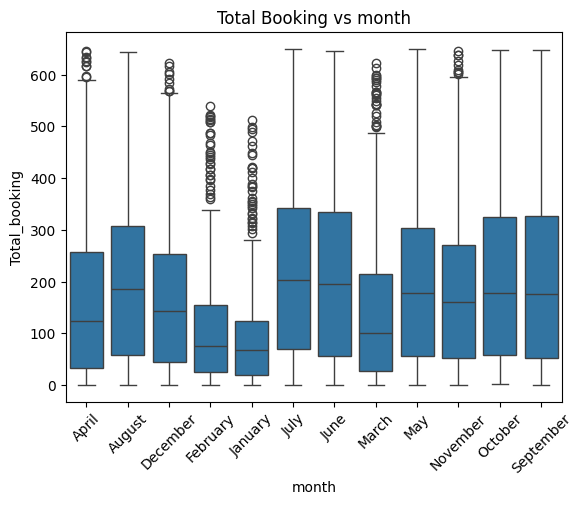

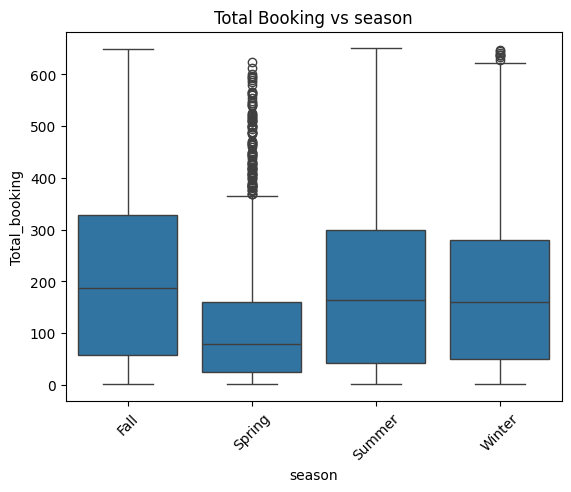

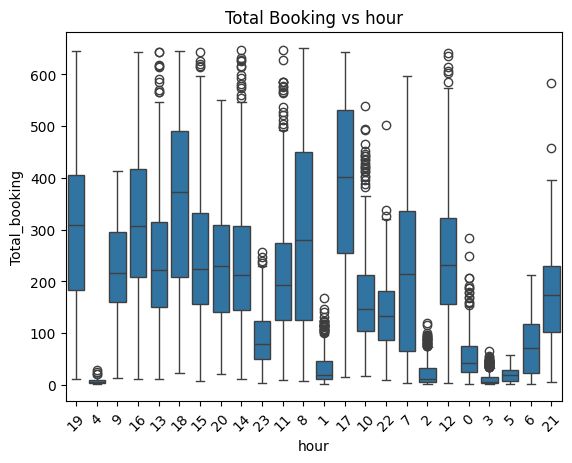

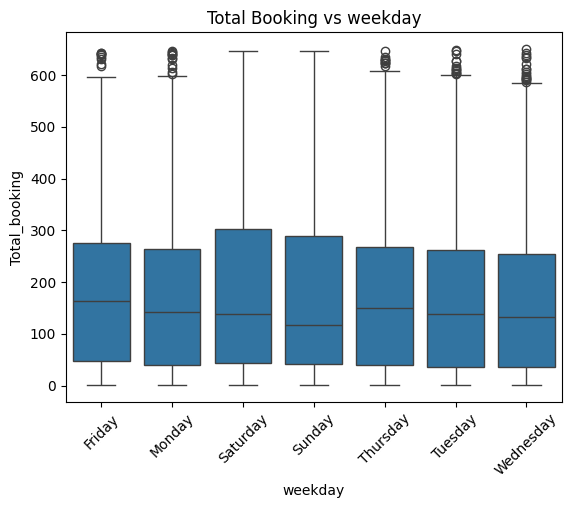

In [44]:
features = ['month', 'season', 'hour', 'weekday']
for feature in features:
    sns.boxplot(x=new_train[feature], y=new_train['Total_booking'])
    plt.title(f'Total Booking vs {feature}')
    plt.xticks(rotation=45)
    plt.show()

(array([2695., 1355., 1189.,  974.,  709.,  572.,  354.,  292.,  198.,
         128.]),
 array([  1. ,  65.9, 130.8, 195.7, 260.6, 325.5, 390.4, 455.3, 520.2,
        585.1, 650. ]),
 <BarContainer object of 10 artists>)

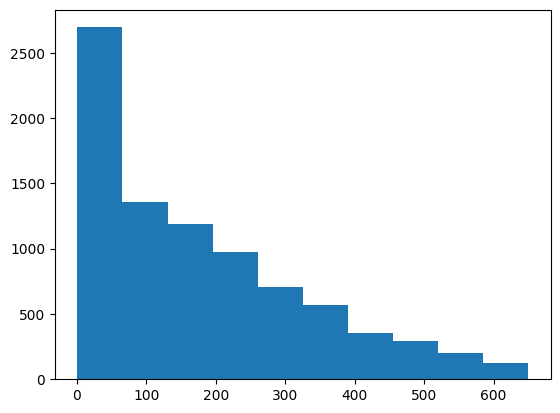

In [45]:
plt.hist(new_test.Total_booking)

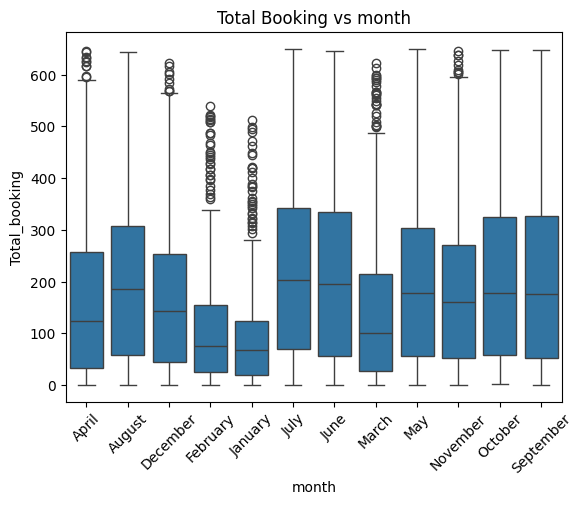

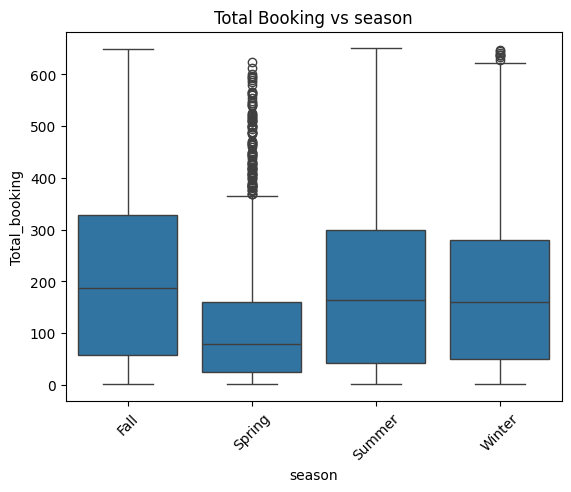

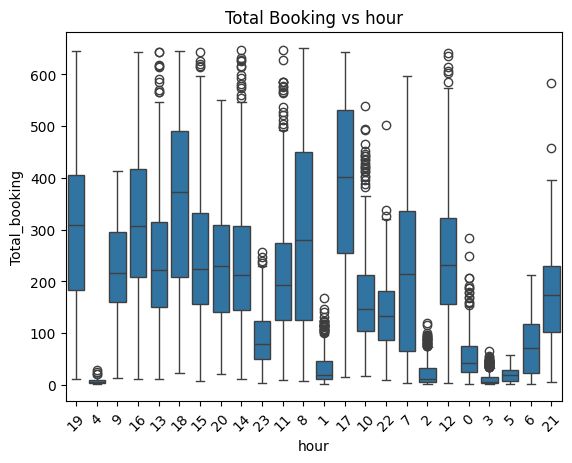

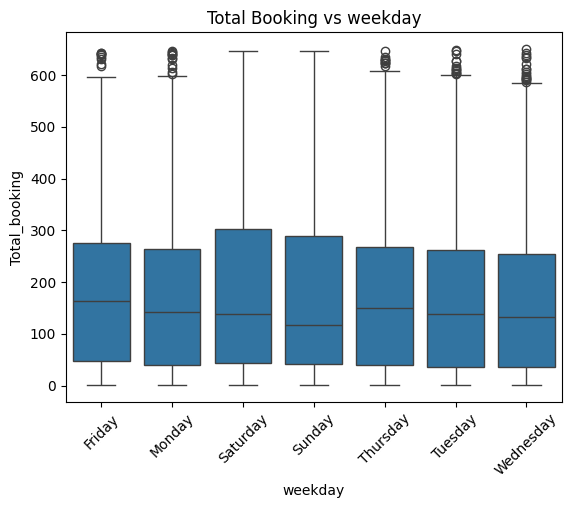

In [46]:
features = ['month', 'season', 'hour', 'weekday']
for feature in features:
    sns.boxplot(x=new_test[feature], y=new_test['Total_booking'])
    plt.title(f'Total Booking vs {feature}')
    plt.xticks(rotation=45)
    plt.show()

#7.Convert the categorical variables into one hot vector

In [47]:
new_train.dtypes

season           category
holiday          category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
Total_booking       int64
date               object
hour               object
weekday          category
month            category
dtype: object

In [48]:
cat_var = ['season','holiday','workingday','weather','weekday','month']
for var in cat_var:
  dummy_df = pd.get_dummies(new_train[var],prefix=var)
  new_train = new_train.join(dummy_df)
new_train.drop(columns=['season', 'holiday','workingday','weather','weekday','month'], axis = 1, inplace=True)
new_train.head()

,temp,atemp,humidity,windspeed,Total_booking,date,hour,season_Fall,season_Spring,season_Summer,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,22.14,25.760,77,16.9979,504,2012-05-02,19,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,28.70,33.335,79,19.0012,5,2012-09-05,4,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,5.74,6.060,50,22.0028,139,2011-01-13,9,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,13.94,16.665,29,8.9981,209,2011-11-18,16,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,30.34,33.335,51,19.0012,184,2011-09-13,13,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [49]:
cat_var = ['season','holiday','workingday','weather','weekday','month']
for var in cat_var:
  dummy_df = pd.get_dummies(new_test[var],prefix=var)
  new_test = new_test.join(dummy_df)
new_test.drop(columns=['season', 'holiday','workingday','weather','weekday','month'], axis = 1, inplace=True)
new_test.head()

,temp,atemp,humidity,windspeed,Total_booking,date,hour,season_Fall,season_Spring,season_Summer,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,22.14,25.760,77,16.9979,504,2012-05-02,19,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,28.70,33.335,79,19.0012,5,2012-09-05,4,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,5.74,6.060,50,22.0028,139,2011-01-13,9,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,13.94,16.665,29,8.9981,209,2011-11-18,16,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,30.34,33.335,51,19.0012,184,2011-09-13,13,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [50]:
new_test.head()

,temp,atemp,humidity,windspeed,Total_booking,date,hour,season_Fall,season_Spring,season_Summer,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,22.14,25.760,77,16.9979,504,2012-05-02,19,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,28.70,33.335,79,19.0012,5,2012-09-05,4,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,5.74,6.060,50,22.0028,139,2011-01-13,9,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,13.94,16.665,29,8.9981,209,2011-11-18,16,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,30.34,33.335,51,19.0012,184,2011-09-13,13,True,False,False,...,False,False,False,False,False,False,False,False,False,True


#8. Split your dataset for training and testing. And also using the test.csv data

In [51]:
x=new_train.drop('Total_booking',axis=1)
y=new_train['Total_booking']

In [52]:
xTest=new_test.drop('Total_booking',axis=1)
yTest=new_test['Total_booking']

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [54]:
print(x_train.dtypes)

temp                                   float64
atemp                                  float64
humidity                                 int64
windspeed                              float64
date                                    object
hour                                    object
season_Fall                               bool
season_Spring                             bool
season_Summer                             bool
season_Winter                             bool
holiday_0                                 bool
holiday_1                                 bool
workingday_0                              bool
workingday_1                              bool
weather_ Clear + Few clouds               bool
weather_ Heavy Rain + Thunderstorm        bool
weather_ Light Snow, Light Rain           bool
weather_ Mist + Cloudy                    bool
weekday_Friday                            bool
weekday_Monday                            bool
weekday_Saturday                          bool
weekday_Sunda

In [55]:
for col in x_train.select_dtypes(include=['object', 'datetime64']).columns:
    x_train[col] = pd.to_datetime(x_train[col], errors='coerce').astype('int64', errors='ignore')
    x_test[col] = pd.to_datetime(x_test[col], errors='coerce').astype('int64', errors='ignore')


In [56]:
print(x_train.dtypes)


temp                                   float64
atemp                                  float64
humidity                                 int64
windspeed                              float64
date                                     int64
hour                                     int64
season_Fall                               bool
season_Spring                             bool
season_Summer                             bool
season_Winter                             bool
holiday_0                                 bool
holiday_1                                 bool
workingday_0                              bool
workingday_1                              bool
weather_ Clear + Few clouds               bool
weather_ Heavy Rain + Thunderstorm        bool
weather_ Light Snow, Light Rain           bool
weather_ Mist + Cloudy                    bool
weekday_Friday                            bool
weekday_Monday                            bool
weekday_Saturday                          bool
weekday_Sunda

In [57]:
print(xTest.dtypes)

temp                                   float64
atemp                                  float64
humidity                                 int64
windspeed                              float64
date                                    object
hour                                    object
season_Fall                               bool
season_Spring                             bool
season_Summer                             bool
season_Winter                             bool
holiday_0                                 bool
holiday_1                                 bool
workingday_0                              bool
workingday_1                              bool
weather_ Clear + Few clouds               bool
weather_ Heavy Rain + Thunderstorm        bool
weather_ Light Snow, Light Rain           bool
weather_ Mist + Cloudy                    bool
weekday_Friday                            bool
weekday_Monday                            bool
weekday_Saturday                          bool
weekday_Sunda

In [58]:
for col in xTest.select_dtypes(include=['object', 'datetime64']).columns:
    xTest[col] = pd.to_datetime(xTest[col], errors='coerce').astype('int64', errors='ignore')

In [59]:
print(xTest.dtypes)

temp                                   float64
atemp                                  float64
humidity                                 int64
windspeed                              float64
date                                     int64
hour                                     int64
season_Fall                               bool
season_Spring                             bool
season_Summer                             bool
season_Winter                             bool
holiday_0                                 bool
holiday_1                                 bool
workingday_0                              bool
workingday_1                              bool
weather_ Clear + Few clouds               bool
weather_ Heavy Rain + Thunderstorm        bool
weather_ Light Snow, Light Rain           bool
weather_ Mist + Cloudy                    bool
weekday_Friday                            bool
weekday_Monday                            bool
weekday_Saturday                          bool
weekday_Sunda

In [60]:
x_train = x_train.apply(pd.to_numeric, errors='coerce')
x_test = x_test.apply(pd.to_numeric, errors='coerce')


In [61]:
xTest = xTest.apply(pd.to_numeric, errors='coerce')

In [62]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [63]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xTest = sc.fit_transform(xTest)

#9.Fit various models (Random Forest Regressor, Ada Boost Regressor, BaggingRegressor, SVR, and K-Neighbors Regressor)

Random Forest Reg.

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
yRfPred=rf.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, yRfPred))
print("train_score (R²): ",rf.score(x_train,y_train))
print("test_score (R²): ",rf.score(x_test,y_test))

#calculating RMSE (Root Mean Squared Error).
rmse_RFR = np.sqrt(mean_squared_error(y_test, yRfPred))
print("RMSE: ", rmse_RFR)

mean_squared_error:  13329.477732946809
train_score (R²):  0.913101595115783
test_score (R²):  0.4504109575892339
RMSE:  115.45335739140204


In [65]:
# testRfPred = rf.predict(xTest)
# print("mean_squared_error: ",mean_squared_error(yTest, testRfPred))
# print("train_score (R²): ",rf.score(x_train,y_train))
# print("test_score (R²): ",rf.score(xTest,yTest))

Ada Boost Regressor

In [66]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Create a base regressor (weak learner)
base_regressor = DecisionTreeRegressor(max_depth=4)

# Create the AdaBoostRegressor instance
ada_regressor = AdaBoostRegressor(base_regressor, n_estimators=50, random_state=42)
ada_regressor.fit(x_train, y_train)
yAdaPred = ada_regressor.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, yAdaPred))
print("train_score (R²): ",ada_regressor.score(x_train,y_train))
print("test_score (R²): ",ada_regressor.score(x_test,y_test))

#calculating RMSE (Root Mean Squared Error).
rmse_Ada= np.sqrt(mean_squared_error(y_test, yAdaPred))
print("RMSE: ", rmse_Ada)

mean_squared_error:  18084.505769637584
train_score (R²):  0.2768820844749422
test_score (R²):  0.2543559164482114
RMSE:  134.47864428836866


In [67]:
# testAdaPred = ada_regressor.predict(xTest)
# print("mean_squared_error: ",mean_squared_error(yTest, testAdaPred))
# print("train_score(R²):", ada_regressor.score(x_train,y_train))
# print("test_score (R²): ",ada_regressor.score(xTest,yTest))

BaggingRegressor

In [68]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Create a base regressor (weak learner)
base_regressor = DecisionTreeRegressor(max_depth=4)

# Create the Bagging Regressor
bagging_model = BaggingRegressor(base_regressor, n_estimators=10)
bagging_model.fit(x_train, y_train)
yBagPred = bagging_model.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, yBagPred))
print("train_score (R²): ",bagging_model.score(x_train,y_train))
print("test_score (R²): ",bagging_model.score(x_test,y_test))

#calculating RMSE (Root Mean Squared Error).
rmse_Bag= np.sqrt(mean_squared_error(y_test, yBagPred))
print("RMSE: ", rmse_Bag)

mean_squared_error:  16283.886498292719
train_score (R²):  0.34367215111829397
test_score (R²):  0.3285974314506166
RMSE:  127.60833240150393


In [69]:
# testBagPred = bagging_model.predict(xTest)
# print("mean_squared_error: ",mean_squared_error(yTest, testBagPred))
# print("train_score (R²): ",bagging_model.score(x_train,y_train))
# print("test_score (R²): ", bagging_model.score(xTest, yTest))

SVR

In [70]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(x_train, y_train)
ySVRPred = svr.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, ySVRPred))
print("train_score (R²): ",svr.score(x_train,y_train))
print("test_score (R²): ",svr.score(x_test,y_test))

#calculating RMSE (Root Mean Squared Error).
rmse_SVR= np.sqrt(mean_squared_error(y_test, ySVRPred))
print("RMSE: ", rmse_SVR)

mean_squared_error:  20325.986037213417
train_score (R²):  0.16102655447483438
test_score (R²):  0.16193721719229615
RMSE:  142.56923243538003


In [71]:
# testSVRPred = svr.predict(xTest)
# print("mean_squared_error: ",mean_squared_error(yTest, testSVRPred))
# print("train_score (R²): ",svr.score(x_train,y_train))
# print("test_score (R²): ",svr.score(xTest,yTest))

KNeighborsRegressor

In [72]:
from sklearn.neighbors import KNeighborsRegressor
k = 5  # Number of neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(x_train, y_train)
yKNRPred = knn_regressor.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, yKNRPred))
print("train_score (R²): ",knn_regressor.score(x_train,y_train))
print("test_score (R²): ",knn_regressor.score(x_test,y_test))

#calculating RMSE (Root Mean Squared Error).
rmse_KNR= np.sqrt(mean_squared_error(y_test, yKNRPred))
print("RMSE: ", rmse_KNR)

mean_squared_error:  15766.544657534247
train_score (R²):  0.5756777510354618
test_score (R²):  0.3499280051278356
RMSE:  125.56490217228


In [73]:
# testKNRPred = knn_regressor.predict(xTest)
# print("mean_squared_error: ",mean_squared_error(yTest, testKNRPred))
# print("train_score (R²): ",knn_regressor.score(x_train,y_train))
# print("test_score (R²): ",knn_regressor.score(xTest,yTest))

#10.Display a Factorplot to visualize the RMSE values achieved by different modeling algorithm.

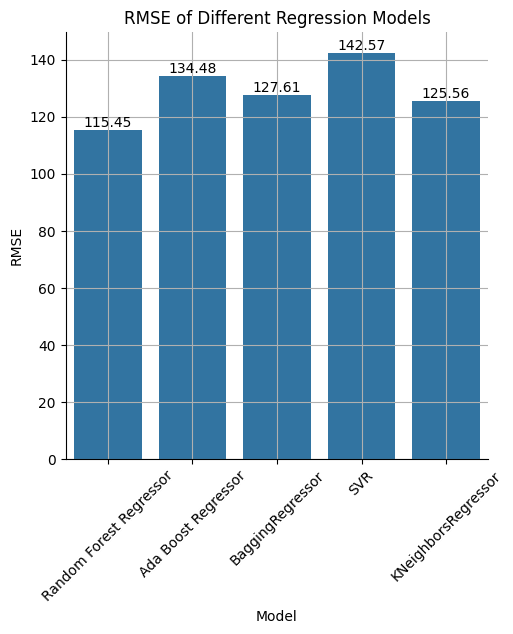

In [74]:
result = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'Ada Boost Regressor', 'BaggingRegressor', 'SVR', 'KNeighborsRegressor'],
    'RMSE': [rmse_RFR, rmse_Ada, rmse_Bag, rmse_SVR, rmse_KNR]
})

# Create a factorplot/catplot
fig = sns.catplot(x='Model', y='RMSE', data=result, kind='bar')
plt.title('RMSE of Different Regression Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
# Rotate x labels for better readability
plt.xticks(rotation=45)
plt.grid(True)
for ax in fig.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.show()

Based on the RMSE (Root Mean Squared Error) values you've provided, the Random Forest model has the lowest RMSE at 114.77

#11. Perform Hyper-parameter tuning on the best model using GridSearchCVand print the best parameters using model.best_params_

In [75]:
from sklearn.model_selection import GridSearchCV


In [76]:
# Initialize the model
rf = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [10,100,10],          # Number of trees
    'max_depth': [None, 10, 20, 30],          # Maximum depth of trees
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]              # Minimum samples required at a leaf node
}

In [77]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,                     # Number of cross-validation folds
                           scoring='neg_mean_squared_error',  # Scoring metric
                           verbose=2,                # Level of verbosity
                           n_jobs=-1)                # Use all available cores

In [78]:
# Fit GridSearchCV
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [79]:
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(x_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Test RMSE: ", rmse)

Test RMSE:  114.4803383086833


In [80]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [81]:
best_rf = grid_search.best_estimator_

In [82]:
y_pred = best_rf.predict(xTest)

In [83]:
from sklearn.metrics import mean_squared_log_error

# Ensure yTest and y_pred are non-negative for MSLE
yTest = np.maximum(yTest, 1e-10)
y_pred = np.maximum(y_pred, 1e-10)

# Compute Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(yTest, y_pred)
print("Mean Squared Logarithmic Error (MSLE): ", msle)

Mean Squared Logarithmic Error (MSLE):  1.117750093664127


#Visualisating the model to understand the difference

Mean Absolute Error (MAE): 65.88095044088345
Mean Squared Error (MSE): 8240.800979131736


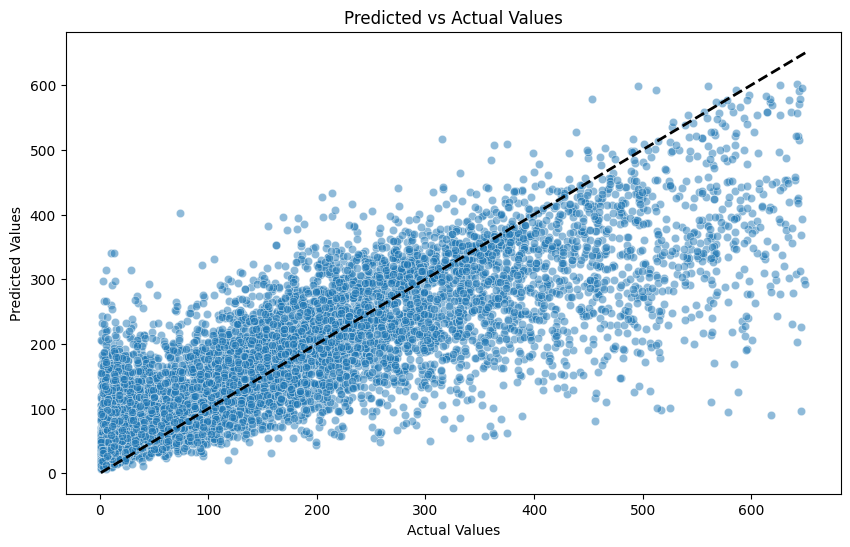

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Additional metrics
mae = mean_absolute_error(yTest, y_pred)
mse = mean_squared_error(yTest, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=yTest, y=y_pred, alpha=0.5)
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

#save your trained model for later use or deployment

In [85]:
# import joblib

# # Save the model to a file
# joblib.dump(best_rf, 'best_random_forest_model.pkl')